<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/nycflights13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd

from plotnine import *

In [2]:
flights = pd.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/nycflights13.csv")

In [3]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


How many flights flew out of each airport?

In [8]:
flights.groupby('origin').count()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,dest,air_time,distance,hour,minute,time_hour
origin,,,,,,,,,,,,,,,,,,
EWR,120835,120835,120835,117596,120835,117596,117445,120835,117127,120835,120835,120229,120835,117127,120835,120835,120835,120835
JFK,111279,111279,111279,109416,111279,109416,109284,111279,109079,111279,111279,110370,111279,109079,111279,111279,111279,111279
LGA,104662,104662,104662,101509,104662,101509,101334,104662,101140,104662,104662,103665,104662,101140,104662,104662,104662,104662


What's the average delay time out of each of the major airports

In [12]:
LaGuardia = "LGA"
JohnFKennedy = "JFK"
Newark = "EWR"

def mean_departure_delay(airport: str):
  return flights[flights['origin'] == airport]['dep_delay'].mean()

average_delays = [mean_departure_delay(airport) for airport in [Newark, JohnFKennedy, LaGuardia]]
average_delays

[15.10795435218885, 12.112159099217665, 10.3468756464944]

In [15]:
flights = flights.assign(timestamp = pd.to_datetime(flights['time_hour']))

In [16]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,timestamp
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z,2013-09-30 18:00:00+00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z,2013-10-01 02:00:00+00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z,2013-09-30 16:00:00+00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z,2013-09-30 15:00:00+00:00


In [19]:
flights_by_day_of_the_month = flights.groupby('day').count()

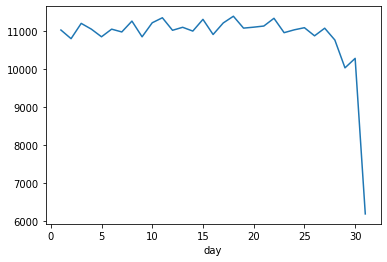

In [22]:
flights_by_day_of_the_month['year'].plot(kind = "line")

In [26]:
# flights_by_day_of_the_month
# (
#     ggplot(
#         aes(
#             y = 'month'
#         ),
#         data = flights_by_day_of_the_month
#     ) +
#     geom_line()
# )

KeyError: ignored